In [1]:
import pandas as pd
train_data = pd.read_table('assignment-comp3222-comp6246-mediaeval2015-dataset/mediaeval-2015-trainingset.txt',sep="\t",header=0)
test_data = pd.read_table('assignment-comp3222-comp6246-mediaeval2015-dataset/mediaeval-2015-testset.txt',sep="\t",header=0)

C:\Users\tosin\AppData\Local\Temp\ipykernel_27252\501313941.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Word Cloud to visualise the words from the the training dataset of tweets

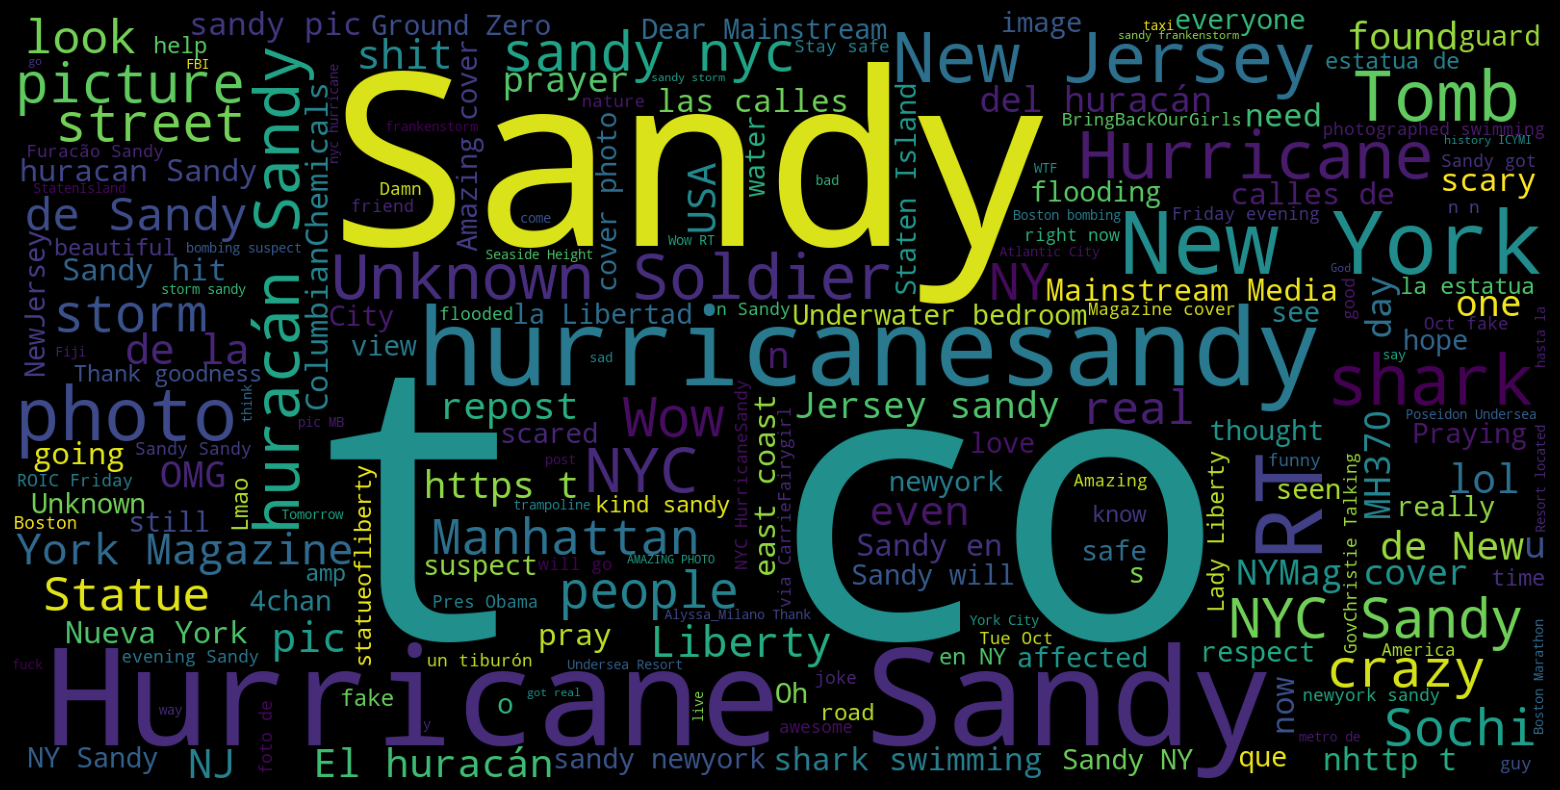

In [2]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black", width=1600, height=800).generate(' '.join(train_data['tweetText'].tolist()))
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud")

## Word Cloud to visualise the words from the the test dataset of tweets

(-0.5, 1599.5, 799.5, -0.5)

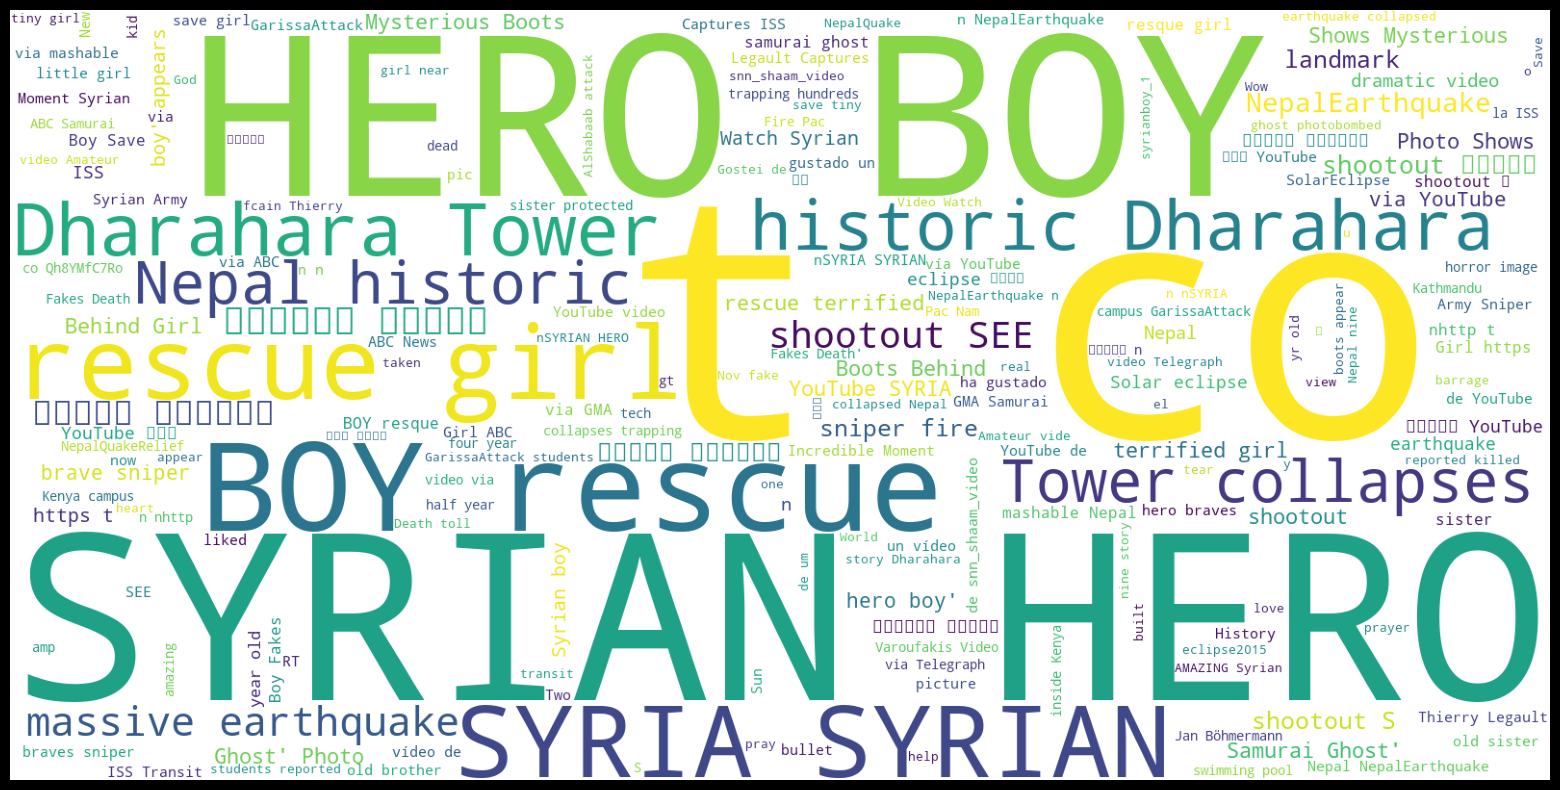

In [3]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(test_data['tweetText'].tolist()))
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

# Bar Chart Visualtion - Exploratory Data Analysis

In [4]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_data.tweetText, 20)
"""for word, freq in common_words:
    print(word, freq) """
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

In [5]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_data.tweetText, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

http 14814
sandy 11104
hurricane 2976
rt 1655
hurricanesandy 1653
new 1551
nyc 1529
york 935
photo 876
jersey 703
la 697
ny 690
shark 565
newyork 545
tomb 532
real 518
cover 498
en 487
unknown 469
el 464


In [6]:
from plotly.offline import iplot
x1 = train_data.loc[train_data.label == 'real', 'username']
x0 = train_data.loc[train_data.label == 'fake', 'username']
x3 = train_data.loc[train_data.label =='humor','username']

trace1 = go.Histogram(
    x=x0, name='real',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'fake',
    opacity=0.75
)
trace3 = go.Histogram(
    x=x3, name = 'humor',
    opacity=0.75
)
data = [trace1, trace2,trace3]
layout = go.Layout(barmode='overlay', title='Distribution of fake and real tweets based on username')
fig = go.Figure(data=data, layout=layout)

picture = iplot(fig, filename='overlaid histogram',image_width=900,image_height=500)


In [7]:
from plotly.offline import iplot
x1 =test_data.loc[test_data.label == 'real', 'username']
x0 = test_data.loc[test_data.label == 'fake', 'username']
x3 = test_data.loc[test_data.label =='humor','username']

trace1 = go.Histogram(
    x=x0, name='real',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'fake',
    opacity=0.75
)
trace3 = go.Histogram(
    x=x3, name = 'humor',
    opacity=0.75
)
data = [trace1,trace2,trace3]
layout = go.Layout(barmode='overlay', title='Distribution of fake and real tweets based on username')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram',image_width=900,image_height=500)

In [8]:
from plotly.offline import iplot
x1 = train_data.loc[train_data.label == 'fake', 'username']
x0 = test_data.loc[test_data.label == 'fake', 'username']

trace1 = go.Histogram(
    x=x0, name='train',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'test',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of fake tweets based on username in train and test')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram',image_width=900,image_height=500)

In [9]:
from plotly.offline import iplot
x1 = train_data.loc[train_data.label == 'real', 'imageId(s)']
x0 = train_data.loc[train_data.label == 'fake', 'imageId(s)']


trace1 = go.Histogram(
    x=x0, name='real',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'fake',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of fake and real tweets based on imageId')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram',image_width=900,image_height=500)

In [10]:
import plotly.graph_objs as go
layout = go.Layout(
        xaxis=dict(
            range=[0,190]
        )
    )
train_data['length'] = train_data.tweetText.str.len()
fig_thresh= train_data['length'].iplot(
    kind='hist',
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='Tweet Text Length Distribution', layout=layout)

In [12]:
train_process = pd.read_csv('train_final.csv')
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_process.tweetText.dropna(), 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

sandy 10897
hurricane 3792
new 1807
hurricanesandy 1658
nyc 1505
photo 1336
shark 1235
york 994
jersey 723
soldier 681
ny 668
picture 573
street 567
cover 549
newyork 544
tomb 538
real 531
unknown 531
libey 503
amazing 493


In [13]:
test_process = pd.read_csv('test_final.csv')
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_data.tweetText, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

http 14814
sandy 11104
hurricane 2976
rt 1655
hurricanesandy 1653
new 1551
nyc 1529
york 935
photo 876
jersey 703
la 697
ny 690
shark 565
newyork 545
tomb 532
real 518
cover 498
en 487
unknown 469
el 464


In [15]:
pic = train_data['label'].iplot(kind='hist')

In [16]:
test_data['label'].iplot(kind='hist')

In [17]:

import plotly.graph_objs as go
from plotly.offline import iplot
x1 = train_data.loc[train_data.label == 'real', 'length']
x0 = train_data.loc[train_data.label == 'fake', 'length']


trace1 = go.Histogram(
    x=x0, name='real',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'fake',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of fake and real tweets based on length', xaxis=dict(
        range=[0, 190]
    ))
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram',image_width=900,image_height=500)

In [ ]:
from googletrans import Translator
translator = Translator()
train_data['language'] = train_data.tweetText.apply(lambda x : translator.detect(x))